In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
A = np.ones(20)

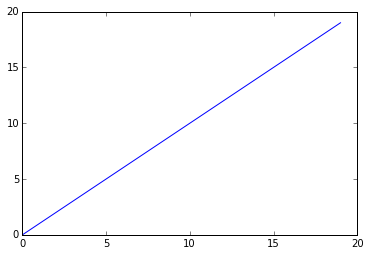

In [12]:
B = A * 1.0
for i in range(len(A)):
    B[i] = i
    
A = B * 1.0
    
plt.plot(A,B)
plt.show()


In [15]:
#http://stackoverflow.com/questions/3252194/numpy-and-line-intersections

#
# line segment intersection using vectors
# see Computer Graphics by F.S. Hill
#
from numpy import *
def perp( a ) :
    b = empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

# line segment a given by endpoints a1, a2
# line segment b given by endpoints b1, b2
# return 
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = dot( dap, db)
    num = dot( dap, dp )
    return (num / denom.astype(float))*db + b1

p1 = array( [0.0, 0.0] )
p2 = array( [1.0, 0.0] )

p3 = array( [4.0, -5.0] )
p4 = array( [4.0, 2.0] )

print seg_intersect( p1,p2, p3,p4)

p1 = array( [2.0, 2.0] )
p2 = array( [4.0, 3.0] )

p3 = array( [6.0, 0.0] )
p4 = array( [6.0, 3.0] )

print seg_intersect( p1,p2, p3,p4)


p1 = array( [2.0, 2.0] )
p2 = array( [4.0, 4.0] )

p3 = array( [5.0, 4.0] )
p4 = array( [6.0, 6.0] )

print seg_intersect( p1,p2, p3,p4)

[ 4.  0.]
[ 6.  4.]
[ 6.  6.]


In [16]:
# Lecture on line sweep http://jeffe.cs.illinois.edu/teaching/373/notes/x06-sweepline.pdf

In [23]:
#    geometry.py
#
#    Geometry functions to find intersecting lines.
#    Thes calc's use this formula for a straight line:-
#        y = mx + b where m is the gradient and b is the y value when x=0
#
#    See here for background http://www.mathopenref.com/coordintersection.html
#    
#    Throughout the code the variable p is a point tuple representing (x,y)
#
#    Copyright (C) 2008  Nick Redshaw
#
#    This program is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    This program is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with this program.  If not, see .
 
from __future__ import division
from pygame import Rect
 
# Calc the gradient 'm' of a line between p1 and p2
def calculateGradient(p1, p2):
    # Ensure that the line is not vertical
    if (p1[0] != p2[0]):
        m = (p1[1] - p2[1]) / (p1[0] - p2[0])
        return m
    else:
        return None
    
# Calc the point 'b' where line crosses the Y axis
def calculateYAxisIntersect(p, m):
    return  p[1] - (m * p[0])
 
# Calc the point where two infinitely long lines (p1 to p2 and p3 to p4) intersect.
# Handle parallel lines and vertical lines (the later has infinate 'm').
# Returns a point tuple of points like this ((x,y),...)  or None
# In non parallel cases the tuple will contain just one point.
# For parallel lines that lay on top of one another the tuple will contain
# all four points of the two lines
def getIntersectPoint(p1, p2, p3, p4):
    m1 = calculateGradient(p1, p2)
    m2 = calculateGradient(p3, p4)
      
    # See if the the lines are parallel
    if (m1 != m2):
        # Not parallel
      
        # See if either line is vertical
        if (m1 is not None and m2 is not None):
            # Neither line vertical           
            b1 = calculateYAxisIntersect(p1, m1)
            b2 = calculateYAxisIntersect(p3, m2)   
            x = (b2 - b1) / (m1 - m2)       
            y = (m1 * x) + b1           
        else:
            # Line 1 is vertical so use line 2's values
            if (m1 is None):
                b2 = calculateYAxisIntersect(p3, m2)   
                x = p1[0]
                y = (m2 * x) + b2
            # Line 2 is vertical so use line 1's values               
            elif (m2 is None):
                b1 = calculateYAxisIntersect(p1, m1)
                x = p3[0]
                y = (m1 * x) + b1           
            else:
                assert false
              
        return ((x,y),)
    
    else:
        # Parallel lines with same 'b' value must be the same line so they intersect
        # everywhere in this case we return the start and end points of both lines
        # the calculateIntersectPoint method will sort out which of these points
        # lays on both line segments
        b1, b2 = None, None # vertical lines have no b value
        if m1 is not None:
            b1 = calculateYAxisIntersect(p1, m1)
          
        if m2 is not None:   
            b2 = calculateYAxisIntersect(p3, m2)
      
        # If these parallel lines lay on one another   
        if b1 == b2:
            return p1,p2,p3,p4
        else:
            return None
        
# For line segments (ie not infinitely long lines) the intersect point
# may not lay on both lines.
#   
# If the point where two lines intersect is inside both line's bounding
# rectangles then the lines intersect. Returns intersect point if the line
# intesect o None if not
def calculateIntersectPoint(p1, p2, p3, p4):
  
    p = getIntersectPoint(p1, p2, p3, p4)
  
    if p is not None:               
        width = p2[0] - p1[0]
        height = p2[1] - p1[1]       
        r1 = Rect(p1, (width , height))
        r1.normalize()
       
        width = p4[0] - p3[0]
        height = p4[1] - p3[1]
        r2 = Rect(p3, (width, height))
        r2.normalize()              
  
        # Ensure both rects have a width and height of at least 'tolerance' else the
        # collidepoint check of the Rect class will fail as it doesn't include the bottom
        # and right hand side 'pixels' of the rectangle
        tolerance = 1
        if r1.width &lt; tolerance:
            r1.width = tolerance
                    
        if r1.height &lt; tolerance:
            r1.height = tolerance
        
        if r2.width &lt; tolerance:
            r2.width = tolerance
                    
        if r2.height &lt; tolerance:
            r2.height = tolerance
 
        for point in p:                 
            try:    
                res1 = r1.collidepoint(point)
                res2 = r2.collidepoint(point)
                if res1 and res2:
                    point = [int(pp) for pp in point]                                
                    return point
            except:
                # sometimes the value in a point are too large for PyGame's Rect class
                str = "point was invalid  ", point                
                print str
                
        # This is the case where the infinately long lines crossed but 
        # the line segments didn't
        return None            
    
    else:
        return None
        
        
# Test script below...
if __name__ == "__main__":
 
    # line 1 and 2 cross, 1 and 3 don't but would if extended, 2 and 3 are parallel
    # line 5 is horizontal, line 4 is vertical
    p1 = (1,5)
    p2 = (4,7)
    
    p3 = (4,5)
    p4 = (3,7)
    
    p5 = (4,1)
    p6 = (3,3)
    
    p7 = (3,1)
    p8 = (3,10)
    
    p9 =  (0,6)
    p10 = (5,6)
    
    p11 = (472.0, 116.0)
    p12 = (542.0, 116.0)  
    
    assert None != calculateIntersectPoint(p1, p2, p3, p4), "line 1 line 2 should intersect"
    assert None != calculateIntersectPoint(p3, p4, p1, p2), "line 2 line 1 should intersect"
    assert None == calculateIntersectPoint(p1, p2, p5, p6), "line 1 line 3 shouldn't intersect"
    assert None == calculateIntersectPoint(p3, p4, p5, p6), "line 2 line 3 shouldn't intersect"
    assert None != calculateIntersectPoint(p1, p2, p7, p8), "line 1 line 4 should intersect"
    assert None != calculateIntersectPoint(p7, p8, p1, p2), "line 4 line 1 should intersect"
    assert None != calculateIntersectPoint(p1, p2, p9, p10), "line 1 line 5 should intersect"
    assert None != calculateIntersectPoint(p9, p10, p1, p2), "line 5 line 1 should intersect"
    assert None != calculateIntersectPoint(p7, p8, p9, p10), "line 4 line 5 should intersect"
    assert None != calculateIntersectPoint(p9, p10, p7, p8), "line 5 line 4 should intersect"
    
    print "\nSUCCESS! All asserts passed for doLinesIntersect"

SyntaxError: invalid syntax (<ipython-input-23-2ddf52b3647a>, line 122)

In [25]:
# http://bryceboe.com/2006/10/23/line-segment-intersection-algorithm/

#!/usr/bin/python

class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

def ccw(A,B,C):
    return (C.y-A.y)*(B.x-A.x) > (B.y-A.y)*(C.x-A.x)

def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)


a = Point(0,0)
b = Point(0,1)
c = Point(1,1)
d = Point(1,0)


print intersect(a,b,c,d)
print intersect(a,c,b,d)
print intersect(a,d,b,c)

False
True
False


In [ ]:
# https://en.wikipedia.org/wiki/Cramer%27s_rule



In [26]:
#
# intersections.py
#
# Python for finding line intersections
#   intended to be easily adaptable for line-segment intersections
#

import math

def intersectLines( pt1, pt2, ptA, ptB ): 
    """ this returns the intersection of Line(pt1,pt2) and Line(ptA,ptB)
        
        returns a tuple: (xi, yi, valid, r, s), where
        (xi, yi) is the intersection
        r is the scalar multiple such that (xi,yi) = pt1 + r*(pt2-pt1)
        s is the scalar multiple such that (xi,yi) = pt1 + s*(ptB-ptA)
            valid == 0 if there are 0 or inf. intersections (invalid)
            valid == 1 if it has a unique intersection ON the segment    """

    DET_TOLERANCE = 0.00000001

    # the first line is pt1 + r*(pt2-pt1)
    # in component form:
    x1, y1 = pt1;   x2, y2 = pt2
    dx1 = x2 - x1;  dy1 = y2 - y1

    # the second line is ptA + s*(ptB-ptA)
    x, y = ptA;   xB, yB = ptB;
    dx = xB - x;  dy = yB - y;

    # we need to find the (typically unique) values of r and s
    # that will satisfy
    #
    # (x1, y1) + r(dx1, dy1) = (x, y) + s(dx, dy)
    #
    # which is the same as
    #
    #    [ dx1  -dx ][ r ] = [ x-x1 ]
    #    [ dy1  -dy ][ s ] = [ y-y1 ]
    #
    # whose solution is
    #
    #    [ r ] = _1_  [  -dy   dx ] [ x-x1 ]
    #    [ s ] = DET  [ -dy1  dx1 ] [ y-y1 ]
    #
    # where DET = (-dx1 * dy + dy1 * dx)
    #
    # if DET is too small, they're parallel
    #
    DET = (-dx1 * dy + dy1 * dx)

    if math.fabs(DET) < DET_TOLERANCE: return (0,0,0,0,0)

    # now, the determinant should be OK
    DETinv = 1.0/DET

    # find the scalar amount along the "self" segment
    r = DETinv * (-dy  * (x-x1) +  dx * (y-y1))

    # find the scalar amount along the input line
    s = DETinv * (-dy1 * (x-x1) + dx1 * (y-y1))

    # return the average of the two descriptions
    xi = (x1 + r*dx1 + x + s*dx)/2.0
    yi = (y1 + r*dy1 + y + s*dy)/2.0
    return ( xi, yi, 1, r, s )


def testIntersection( pt1, pt2, ptA, ptB ):
    """ prints out a test for checking by hand... """
    print "Line segment #1 runs from", pt1, "to", pt2
    print "Line segment #2 runs from", ptA, "to", ptB

    result = intersectLines( pt1, pt2, ptA, ptB )
    print "    Intersection result =", result
    print


if __name__ == "__main__":

    pt1 = (10,10)
    pt2 = (20,20)

    pt3 = (10,20)
    pt4 = (20,10)

    pt5 = (40,20)

    testIntersection( pt1, pt2, pt3, pt4 )
    testIntersection( pt1, pt3, pt2, pt4 )
    testIntersection( pt1, pt2, pt4, pt5 )

Line segment #1 runs from (10, 10) to (20, 20)
Line segment #2 runs from (10, 20) to (20, 10)
    Intersection result = (15.0, 15.0, 1, 0.5, 0.5)

Line segment #1 runs from (10, 10) to (10, 20)
Line segment #2 runs from (20, 20) to (20, 10)
    Intersection result = (0, 0, 0, 0, 0)

Line segment #1 runs from (10, 10) to (20, 20)
Line segment #2 runs from (20, 10) to (40, 20)
    Intersection result = (0.0, 0.0, 1, -1.0, -1.0)



In [ ]:
# https://martin-thoma.com/how-to-check-if-two-line-segments-intersect/

In [28]:
# http://infohost.nmt.edu/tcc/contrib.html/lang/python/examples/homcoord/Line-intersect.html